In [1]:
import pandas as pd
import numpy as np
from utils import initial_data_check

In [2]:
steam = pd.read_csv('~/Pet_project/steam_games.csv')

In [3]:
steam['release_date'] = pd.to_datetime(steam['release_date'], format='%b %d, %Y', errors='coerce')

In [4]:
steam['publisher'] = steam['publisher'].str.split(',').str[0]

In [5]:
steam['recent_reviews'] = steam['recent_reviews'].str.split(',').str[0]

In [6]:
import re

def extract_reviews(text):
    match = re.search(r'\(([\d,]+)\)', str(text))
    if match:
        return int(match.group(1).replace(',', ''))
    return None


In [7]:
steam['all_reviews'] = steam['all_reviews'].apply(extract_reviews)

In [8]:
steam.head()

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,Very Positive,42550.0,2016-05-12,id Software,Bethesda Softworks,"FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,Mixed,836608.0,2017-12-21,PUBG Corporation,PUBG Corporation,"Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,Mixed,7030.0,2018-04-24,Harebrained Schemes,Paradox Interactive,"Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,Mixed,167115.0,2018-12-13,Bohemia Interactive,Bohemia Interactive,"Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,Mixed,11481.0,2003-05-06,CCP,CCP,"Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN


🧩 Обновлённые задания для pet-проекта
Уровень 1 — базовая разведка данных
Загрузить датасет и проверить пропуски, типы данных, описательную статистику.

Посчитать среднюю и медианную цену игр на платформе.

Найти топ-10 самых дорогих игр (без учёта скидок).

Найти топ-10 игр с самым высоким рейтингом Metacritic.

Найти топ-10 игр с наибольшим количеством положительных отзывов.

Уровень 2 — исследовательский анализ
Построить график зависимости положительных отзывов от цены.

Посмотреть, как влияет размер скидки на количество отзывов.

Исследовать среднюю оценку Metacritic по жанрам.

Посмотреть, какие разработчики и издатели чаще всего выпускают игры на Steam.

Построить распределение игр по годам релиза.

Уровень 3 — более сложная аналитика
Построить корреляционную матрицу между числовыми признаками (цена, отзывы, скидка, Metacritic и т.д.).

Сформировать критерии для рейтинга игр, учитывающего отзывы, Metacritic и цену.

Посчитать среднее количество владельцев по жанрам.

Найти жанры, где скидки влияют на продажи сильнее всего.

Проанализировать, какие платформы популярнее у пользователей.

Найти топ-10 самых дорогих игр (без учёта скидок).

In [9]:
def extract_price(price):
    if isinstance(price, str):
        match = re.search(r'\$([\d\.,]+)', price)
        if match:
            return float(match.group(1).replace(',', ''))
    return np.nan

In [10]:
steam['original_price_clean'] = steam['original_price'].apply(extract_price)

In [11]:
steam['discount_price_clean'] = steam['discount_price'].apply(extract_price)

In [12]:
top10cst = steam.query('types == "app"')\
    [['name', 'types', 'original_price_clean']]\
    .sort_values('original_price_clean', ascending=False)\
    .head(10)

In [13]:
top10cst

,name,types,original_price_clean
38148,Strata Spaces VR – Professional Edition Upgrade,app,995.00
26069,Yatsumitsu Fists of Wrath,app,624.74
33186,Super Nitrous Zoomer Sound Track,app,624.74
33185,Bathroom Chef Wall Paper Set,app,624.74
26402,Morendar: Goblin Slayer,app,624.74
25444,Dungeon Creepster,app,624.74
33184,Bathroom Chef Sound Track,app,624.74
33314,Crankies Workshop: Whirlbot Assembly Wall Pape...,app,624.74
28002,Pain Train 2,app,624.74
33183,Honey Comb Home Wall Paper Set,app,624.74


In [14]:
top10ach = steam.query('types == "app"')\
    [['name', 'types', 'achievements']]\
    .sort_values('achievements', ascending=False)\
    .head(10)
top10ach

,name,types,achievements
20589,LOGistICAL,app,9821.0
12720,Trivia Vault: Movie Trivia,app,5000.0
24971,Panda Run,app,5000.0
29201,The Dropping of The Dead,app,5000.0
5520,USA 2020,app,5000.0
26996,Ninja Stealth 3,app,5000.0
5541,Math Problem Challenge,app,5000.0
10153,Digit Daze,app,5000.0
17660,Trivia Vault: Auto Racing Trivia,app,5000.0
25321,Cludbugz's Twisted Magic,app,5000.0


In [15]:
top10rev = steam.query('recent_reviews == "Very Positive"')\
    [['name', 'types', 'all_reviews']]\
    .sort_values('all_reviews', ascending=False)\
    .head(10)
top10rev

,name,types,all_reviews
422,Counter-Strike: Global Offensive,app,3094223.0
386,Team Fortress 2,app,553458.0
661,Unturned,app,325675.0
335,Garry's Mod,app,310394.0
408,Warframe,app,250319.0
416,Tom Clancy's Rainbow Six® Siege,app,248689.0
308,PAYDAY 2,app,215078.0
320,Paladins®,app,204137.0
189,Euro Truck Simulator 2,app,132814.0
801,Life is Strange - Episode 1,app,123683.0


Посмотреть, как влияет размер скидки на количество отзывов.


In [16]:
steam.head()

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,...,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price,original_price_clean,discount_price_clean
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,Very Positive,42550.0,2016-05-12,id Software,Bethesda Softworks,"FPS,Gore,Action,Demons,Shooter,First-Person,Gr...",...,54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99,19.99,14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,Mixed,836608.0,2017-12-21,PUBG Corporation,PUBG Corporation,"Survival,Shooter,Multiplayer,Battle Royale,PvP...",...,37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN,29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,Mixed,7030.0,2018-04-24,Harebrained Schemes,Paradox Interactive,"Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...",...,128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN,39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,Mixed,167115.0,2018-12-13,Bohemia Interactive,Bohemia Interactive,"Survival,Zombies,Open World,Multiplayer,PvP,Ma...",...,NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN,44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,Mixed,11481.0,2003-05-06,CCP,CCP,"Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...",...,NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN,NaN,NaN


In [17]:
#Процент скидки = (Сумма скидки / Исходная цена) × 100. 

In [28]:
steam.loc[steam['discount_price_clean'] > steam['original_price_clean'], 'discount_price_clean'] = np.nan

In [33]:
sale = steam[['name', 'original_price_clean', 'discount_price_clean']]

In [34]:
sale = sale.dropna()

In [35]:
sale['percent_sale'] = round((sale['original_price_clean']-sale['discount_price_clean'])/sale['original_price_clean']*100)

In [36]:
sale

,name,original_price_clean,discount_price_clean,percent_sale
0,DOOM,19.99,14.99,25.0
28,Neverwinter Nights: Enhanced Edition,57.91,46.26,20.0
39,Doom Classic Complete,14.99,7.49,50.0
43,The Evil Within,19.99,9.99,50.0
45,Bright Memory(Early Access) / 光明记忆,6.99,5.24,25.0
...,...,...,...,...
40623,Primus Vita ''I'll soon meet with you'' - Comi...,13.96,4.80,66.0
40631,Fitzzle Gentle Deer,624.74,56.30,91.0
40696,TAL: Arctic 2 - Soundtrack,10.89,1.28,88.0
40808,Last Byte Standing Digital Deluxe,14.99,14.98,0.0


In [59]:
merged_df = sale.merge(steam[['name', 'recent_reviews', 'all_reviews']], on='name', how='left')
merged_df = merged_df.dropna()

In [60]:
merged_df.sort_values(by='percent_sale', ascending=False)

,name,original_price_clean,discount_price_clean,percent_sale,recent_reviews,all_reviews
672,Polygoneer,0.99,0.00,100.0,Mostly Positive,464.0
926,18+,86.56,1.38,98.0,Mixed,101.0
117,RESIDENT EVIL 7 biohazard / BIOHAZARD 7 reside...,29.99,2.05,93.0,Very Positive,12138.0
561,The Deed,27.88,2.38,91.0,Very Positive,1356.0
89,Pinball FX3,269.69,23.97,91.0,Mostly Positive,1024.0
...,...,...,...,...,...,...
546,Delivery from the Pain,7.99,7.19,10.0,Mixed,262.0
225,東方幕華祭 春雪篇 ～ Fantastic Danmaku Festival Part II,12.99,12.78,2.0,Very Positive,622.0
11,Fishing Planet,19.99,19.93,0.0,Mostly Positive,14138.0
156,Power & Revolution 2019 Edition,49.99,49.98,0.0,Mixed,151.0


In [61]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10%', '11-20%', '21-30%', '31-40%', '41-50%', '51-60%', '61-70%', '71-80%', '81-90%', '91-100%']

merged_df['discount_interval'] = pd.cut(merged_df['percent_sale'], bins=bins, labels=labels, right=True, include_lowest=True)


In [77]:
interval_cnt = merged_df.groupby('discount_interval').agg({'discount_interval':'count'})
interval_cnt = interval_cnt

,discount_interval
discount_interval,
0-10%,9
11-20%,22
21-30%,33
31-40%,30
41-50%,40
51-60%,23
61-70%,23
71-80%,18
81-90%,15


In [71]:
merged_df.groupby('discount_interval').agg({'discount_interval':'count'})

,discount_interval
discount_interval,
0-10%,9
11-20%,22
21-30%,33
31-40%,30
41-50%,40
51-60%,23
61-70%,23
71-80%,18
81-90%,15


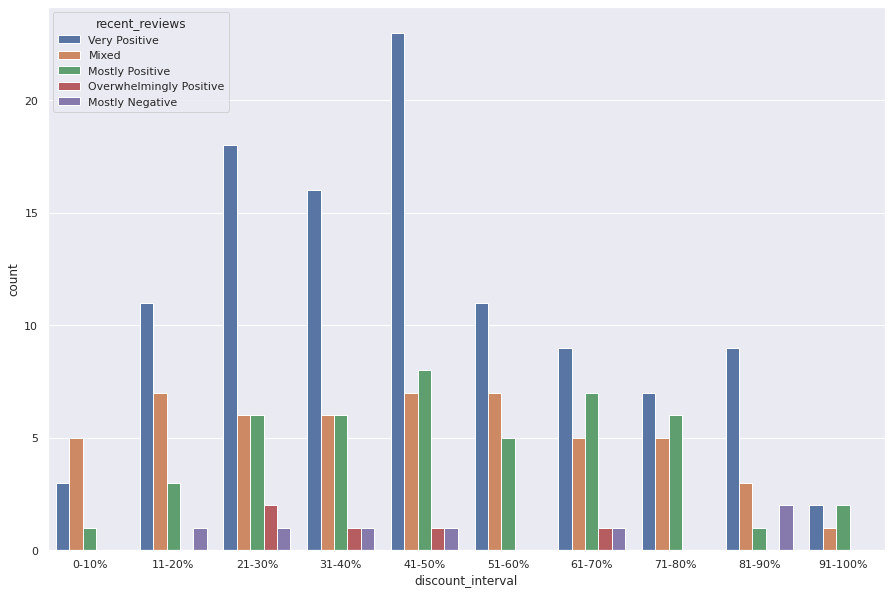

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
sns.countplot(data=merged_df, x='discount_interval', hue='recent_reviews')


In [63]:
merged_df

,name,original_price_clean,discount_price_clean,percent_sale,recent_reviews,all_reviews,discount_interval
0,DOOM,19.99,14.99,25.0,Very Positive,42550.0,21-30%
1,Neverwinter Nights: Enhanced Edition,57.91,46.26,20.0,Mixed,1094.0,11-20%
3,The Evil Within,19.99,9.99,50.0,Mostly Positive,7855.0,41-50%
4,Bright Memory(Early Access) / 光明记忆,6.99,5.24,25.0,Very Positive,7779.0,21-30%
5,Dishonored®: Death of the Outsider™,29.99,14.99,50.0,Very Positive,2396.0,41-50%
...,...,...,...,...,...,...,...
2261,Ninja Stealth 2,11.92,7.08,41.0,Mixed,163.0,41-50%
2360,Dying Light: The Bozak Horde,9.99,6.69,33.0,Mixed,710.0,31-40%
2373,Fallout 4 Nuka-World,19.99,11.99,40.0,Mixed,1761.0,31-40%
2381,Borderlands Game of the Year Enhanced,29.99,20.09,33.0,Mixed,1643.0,31-40%
